# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

# Overall model

Insert propper model in the format below -REPLACE!!!

$$
\begin{align*}
c^{\star},\ell^{\star} & = \arg\max_{c,\ell}\log(c)-\nu\frac{\ell^{1+\frac{1}{\varepsilon}}}{1+\frac{1}{\varepsilon}}\\
 & \text{s.t.} \\
x & = m+w\ell-\left[\tau_{0}w\ell+\tau_{1}\max\{w\ell-\kappa,0\}\right] \\
c & \in [0,x] \\
\ell & \in [0,1]
\end{align*}
$$

where $c$ is consumption, $\ell$ is labor supply, $m$ is cash-on-hand,
$w$ is the wage rate, $\tau_{0}$ is the standard labor income tax,
$\tau_{1}$ is the top bracket labor income tax, $\kappa$ is the
cut-off for the top labor income bracket, $x$ is total resources,
$\nu$ scales the disutility of labor, and $\varepsilon$ is the Frisch
elasticity of labor supply.

# Imports and setup

In [30]:
import numpy as np
from types import SimpleNamespace
import matplotlib.pyplot as plt
from scipy import optimize

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from inauguralproject import ExchangeEconomyClass #From our py-file

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Explain how you solve the model** (delete?)

In [31]:
# code for solving the model (remember documentation and comments) (DELETE?)

a = np.array([1,2,3])
b = inauguralproject.square(a)
print(b)

[1 4 9]


# Question 1

Explanation...

In [32]:
#Setting up the code needed to construct the Edgeworth box further down

model = ExchangeEconomyClass()

par = model.par

N = 75
w1A = 0.8
w2A = 0.3
w1B = 1 - w1A
w2B = 1 - w2A

grid_x1A = np.linspace(0,1,N+1) # goods between 0 and 1 (included). N+1 to ensure inclusion of endpoints (0 and 1) while still having 75 points in between.
grid_x2A = np.linspace(0,1,N+1)

possible_x1A = [] # we create lists to which we later can append the specific data points.
possible_x2A = []

for x1A in grid_x1A:
    for x2A in grid_x2A:
        x1B = 1 - x1A # make consumer B goods expressed by consumer A goods.
        x2B = 1 - x2A
        uA = model.utility_A(x1A,x2A) # refering to model in py-file.
        uB = model.utility_B(x1B,x2B)

        if uA >= model.utility_A(w1A,w2A) and uB >= model.utility_B(w1B, w2B): # we check if allocations satisfy the conditions and append for depiction in edgeworth box.
            possible_x1A.append(x1A)
            possible_x2A.append(x2A)

print(f'First 3 points of [x1A, x2A] = [{", ".join([f"{x:.4f}" for x in possible_x1A[:3]])}], [{", ".join([f"{x:.4f}" for x in possible_x2A[:3]])}]')
#These points fit with the top left points depicted in the edgeworth box below.


First 3 points of [x1A, x2A] = [0.0800, 0.0933, 0.0933], [0.9600, 0.8800, 0.8933]


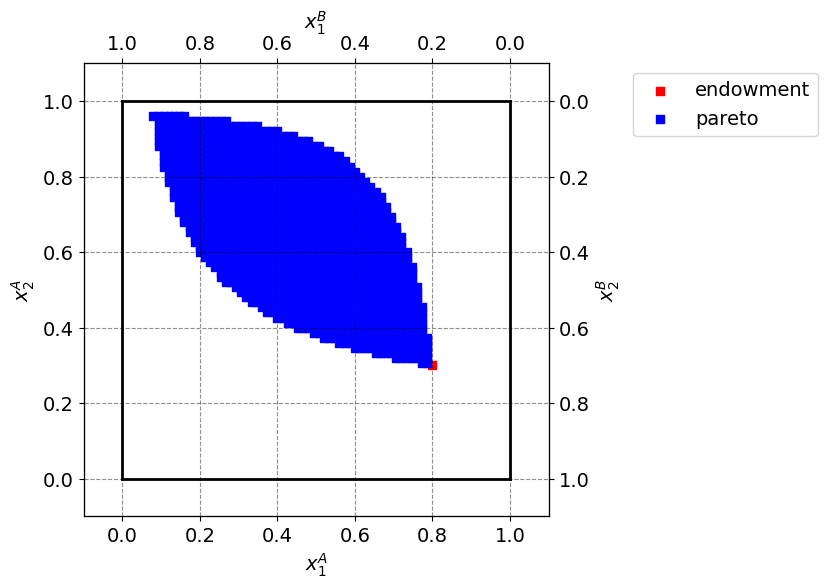

In [33]:
model = ExchangeEconomyClass()

par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='red',label='endowment')
ax_A.scatter(possible_x1A,possible_x2A,marker='s',color='blue',label='pareto')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

Conclusion:

# Question 2

Explanation...

[0.533333333333333, 0.47594936708860747, 0.42409638554216866, 0.3770114942528735, 0.334065934065934]
[-0.2666666666666666, -0.25066666666666654, -0.23466666666666652, -0.2186666666666665, -0.2026666666666665]
<class 'list'>
<class 'list'>
<class 'list'>


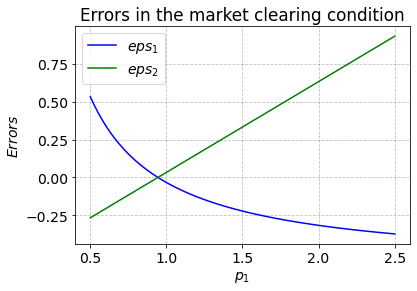

In [34]:
#First we create a list of p1: 
grid_p1 = np.linspace(0.5,2.5,N+1)
p1 = grid_p1.tolist()

# Then we create empty lists of the error terms:
err1 = []
err2 = []

#Using the check_market_clearing from our py-file, we append the eps1 and eps2 to respective error-lists above
for i in p1:
    eps1, eps2 = model.check_market_clearing(i)
    
    err1.append(eps1)
    err2.append(eps2)

# Check
print(err1[0:5])
print(err2[0:5])
print(type(p1))
print(type(err1))
print(type(err2))

# We can display in a figure using matplotlib importet earlier
fig = plt.figure()

# b. create the plot 
ax = fig.add_subplot(1,1,1)

ax.plot(p1,err1,label='$eps_{1}$',color='blue')
ax.plot(p1,err2,label='$eps_{2}$',color='green')

ax.set_title('Errors in the market clearing condition')
ax.set_xlabel('$p_1$')
ax.set_ylabel('$Errors$')
ax.legend(loc='upper left');


Conclusion:

# Question 3

Explanation...

In [35]:
def find_marketclear_p1(p1, err1, err2): #we define a function based on the variables p1, err1 and err2 created above.
    min_diff = float('inf') #min_diff is initially defined to pos infinity we will use for the difference err1 and err2.
    min_diff_p1 = [] # We creat an open list for the corresponding p1
    
    for i in range(len(p1)): #we loop over the i elements in p1
        diff = abs(err1[i] - err2[i]) #we store the difference between the errors for each i
        if diff < min_diff: #if the absolute diff in diff is smaller than the value in min_diff, we want to store that along with the corresponding p1
            min_diff = diff
            min_diff_p1 = p1[i]
    
    return min_diff_p1

# We call the function to store and print the marketprice in the variable marketclear_p1 given the arguments p1, err1, err2.
marketclear_p1 = find_marketclear_p1(p1, err1, err2)
if marketclear_p1 != 0:
    print(f'Market clearing price: p1 = {marketclear_p1:.3f}')
else:
    print("No intersection found.")



Market clearing price: p1 = 0.953


Conclusion:

# Question 4

Explanation...

In [36]:
#not needed - not needed - not needed - not needed - not needed
allocations_x1A_p1 = []
allocations_x2A_p1 = []

for i in p1:
    # Calculate allocation for the current p1 value
    x1A, x2A = model.demand_A(i)
    
    # Append the allocation to the list
    allocations_x1A_p1.append((x1A))
    allocations_x2A_p1.append((x2A))

for idx in range(len(p1)):
    print(f'p1 = {p1[idx]:.3f}')
    print(f'x1A = {allocations_x1A_p1[idx]:.3f}')
    print(f'x2A = {allocations_x2A_p1[idx]:.3f}')

#not needed - not needed - not needed - not needed - not needed

p1 = 0.500
x1A = 0.467
x2A = 0.467
p1 = 0.527
x1A = 0.457
x2A = 0.481
p1 = 0.553
x1A = 0.447
x2A = 0.495
p1 = 0.580
x1A = 0.439
x2A = 0.509
p1 = 0.607
x1A = 0.432
x2A = 0.524
p1 = 0.633
x1A = 0.425
x2A = 0.538
p1 = 0.660
x1A = 0.418
x2A = 0.552
p1 = 0.687
x1A = 0.412
x2A = 0.566
p1 = 0.713
x1A = 0.407
x2A = 0.580
p1 = 0.740
x1A = 0.402
x2A = 0.595
p1 = 0.767
x1A = 0.397
x2A = 0.609
p1 = 0.793
x1A = 0.393
x2A = 0.623
p1 = 0.820
x1A = 0.389
x2A = 0.637
p1 = 0.847
x1A = 0.385
x2A = 0.652
p1 = 0.873
x1A = 0.381
x2A = 0.666
p1 = 0.900
x1A = 0.378
x2A = 0.680
p1 = 0.927
x1A = 0.375
x2A = 0.694
p1 = 0.953
x1A = 0.372
x2A = 0.708
p1 = 0.980
x1A = 0.369
x2A = 0.723
p1 = 1.007
x1A = 0.366
x2A = 0.737
p1 = 1.033
x1A = 0.363
x2A = 0.751
p1 = 1.060
x1A = 0.361
x2A = 0.765
p1 = 1.087
x1A = 0.359
x2A = 0.780
p1 = 1.113
x1A = 0.356
x2A = 0.794
p1 = 1.140
x1A = 0.354
x2A = 0.808
p1 = 1.167
x1A = 0.352
x2A = 0.822
p1 = 1.193
x1A = 0.350
x2A = 0.836
p1 = 1.220
x1A = 0.349
x2A = 0.851
p1 = 1.247
x1A = 0.3

In [59]:
#Question 4a
def max_utilityA_given_p1(p): #we define a function based on the variables p1
    max_uA = float('-inf') #we create the variable to store utility higher than minus infinity
    max_uA_p1 = [] # We creat an open list for the corresponding p1
    
    for i in p: #we loop over the i elements in p1. If demand for both goods given i is pos we will store the utility.
        if 1-model.demand_B(i)[0] > 0 and 1-model.demand_B(i)[1]>0:
            utilityA = model.utility_A(1-model.demand_B(i)[0], 1-model.demand_B(i)[1]) 
            if utilityA > max_uA: #Then if that utility is greater in max_uA, we store it as well as the corresponding price
                max_uA = utilityA
                max_uA_p1 = i
    
    return max_uA_p1, max_uA

p1_4a, uA_4a = max_utilityA_given_p1(p1) #we call the function to print the values
x1A_4a = 1-model.demand_B(p1_4a)[0]
x2A_4a = 1-model.demand_B(p1_4a)[1]

print(f'The price is: {p1_4a:.6f} resulting in the utility: {uA_4a:.6f}')
print(f'This amount of goods obtained for the given price above is: x1A = {x1A_4a:.6f} and x2A = {x2A_4a:.6f}')


The price is: 1.886667 resulting in the utility: 0.633616
This amount of goods obtained for the given price above is: x1A = 0.619317 and x2A = 0.640889


In [65]:
#Question 4b

#We use the function as created above however this time with a positive p (we set it to ]0;100])

grid_p1_pos = np.linspace(0.001,100,1000000)
p1_pos = grid_p1_pos.tolist()

p1_4b, uA_4b = max_utilityA_given_p1(p1_pos)
x1A_4b = 1-model.demand_B(p1_4b)[0]
x2A_4b = 1-model.demand_B(p1_4b)[1]

print(f'The price is: {p1_4b:.6f} resulting in the utility: {uA_4b:.6f}')
print(f'This amount of goods obtained for the given price above is: x1A = {x1A_4b:.6f} and x2A = {x2A_4b:.6f}')

The price is: 1.899383 resulting in the utility: 0.633621
This amount of goods obtained for the given price above is: x1A = 0.620973 and x2A = 0.640041


Conclusion:

# Question 5

Explanation...

In [66]:
#Question 5a
model = ExchangeEconomyClass()
optimal_xA_5a, optimal_xB_5a = model.find_optimal_allocation_constrained(init_guess=[0.9,0.9])
print(f'Optimal allocation for consumer A: x1A = {optimal_xA_5a[0]:.3f}, x2A = {optimal_xA_5a[1]:.3f}')
print(f'Resulting utility for consumer A: {model.utility_A(optimal_xA_5a[0],optimal_xA_5a[1]):.3f}')
print(f'Optimal allocation for consumer B: x1B = {optimal_xB_5a[0]:.3f}, x2B = {optimal_xB_5a[1]:.3f}')
print(f'Resulting utility for consumer B: {model.utility_A(optimal_xB_5a[0],optimal_xB_5a[1]):.3f}')

Optimal allocation for consumer A: x1A = 0.576, x2A = 0.844
Resulting utility for consumer A: 0.743
Optimal allocation for consumer B: x1B = 0.424, x2B = 0.156
Resulting utility for consumer B: 0.217


In [67]:
#We want to create a 3d figure to vizualize whether, we have fount the optimal allocation for consumer A
# First we create a mesh of combinations of utility for x1 and x2 values

model = ExchangeEconomyClass()

x_max = 1

def objective_function(x1A, x2A):
    return -model.utility_A(x1A, x2A) 

# a. Create numbers distributed evenly between 0 and x_max
x_vec = np.linspace(0,x_max,N)

# b. Create meshgrids similar to x1_values and x2_values above
x1_mesh,x2_mesh = np.meshgrid(x_vec,x_vec,indexing='ij')

print('Dimension of grid over x1 (same as x2): ', x1_mesh.shape) # Note that the grid is 2d. u_func needs 2d to calculate element by element. 
u_values_mesh = objective_function(x1_mesh, x2_mesh)

print(u_values_mesh)

Dimension of grid over x1 (same as x2):  (75, 75)
[[-0.         -0.         -0.         ... -0.         -0.
  -0.        ]
 [-0.         -0.01351351 -0.02145137 ... -0.23387831 -0.23603887
  -0.23818958]
 [-0.         -0.01702596 -0.02702703 ... -0.2946682  -0.29739034
  -0.30010007]
 ...
 [-0.         -0.05621848 -0.08924128 ... -0.97297297 -0.98196126
  -0.99090859]
 [-0.         -0.05647756 -0.08965253 ... -0.97745678 -0.98648649
  -0.99547505]
 [-0.         -0.05673428 -0.09006005 ... -0.98189983 -0.99097058
  -1.        ]]


In [68]:
print(x_vec)

[0.         0.01351351 0.02702703 0.04054054 0.05405405 0.06756757
 0.08108108 0.09459459 0.10810811 0.12162162 0.13513514 0.14864865
 0.16216216 0.17567568 0.18918919 0.2027027  0.21621622 0.22972973
 0.24324324 0.25675676 0.27027027 0.28378378 0.2972973  0.31081081
 0.32432432 0.33783784 0.35135135 0.36486486 0.37837838 0.39189189
 0.40540541 0.41891892 0.43243243 0.44594595 0.45945946 0.47297297
 0.48648649 0.5        0.51351351 0.52702703 0.54054054 0.55405405
 0.56756757 0.58108108 0.59459459 0.60810811 0.62162162 0.63513514
 0.64864865 0.66216216 0.67567568 0.68918919 0.7027027  0.71621622
 0.72972973 0.74324324 0.75675676 0.77027027 0.78378378 0.7972973
 0.81081081 0.82432432 0.83783784 0.85135135 0.86486486 0.87837838
 0.89189189 0.90540541 0.91891892 0.93243243 0.94594595 0.95945946
 0.97297297 0.98648649 1.        ]


In [69]:
print(x2_mesh)

[[0.         0.01351351 0.02702703 ... 0.97297297 0.98648649 1.        ]
 [0.         0.01351351 0.02702703 ... 0.97297297 0.98648649 1.        ]
 [0.         0.01351351 0.02702703 ... 0.97297297 0.98648649 1.        ]
 ...
 [0.         0.01351351 0.02702703 ... 0.97297297 0.98648649 1.        ]
 [0.         0.01351351 0.02702703 ... 0.97297297 0.98648649 1.        ]
 [0.         0.01351351 0.02702703 ... 0.97297297 0.98648649 1.        ]]


In [70]:
#We then want to store the values, where the constraint returns a positive number/holds

matrix = np.ones((N,N)) + np.nan

for i,x1 in enumerate(x_vec):
    for m,x2 in enumerate(x_vec):
        var = model.utility_B(1 - x1, 1 - x2) - model.utility_B(par.w1B, par.w2B)
        if var > 0:
            matrix[i,m] = True

print(matrix)

[[ 1.  1.  1. ... nan nan nan]
 [ 1.  1.  1. ... nan nan nan]
 [ 1.  1.  1. ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [71]:
u_val_const = matrix * u_values_mesh

/var/folders/05/z6z0pv093xnbwyg0ggtl3kwh0000gn/T/ipykernel_36787/927191321.py:5: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(x1_mesh,x2_mesh,u_val_const); # create surface plot in the axis


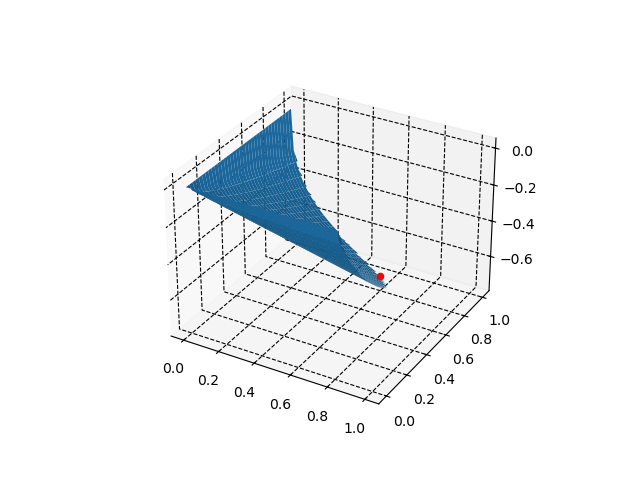

In [72]:
#we can now plot the result we got from above
%matplotlib widget
fig = plt.figure() # create the figure
ax = fig.add_subplot(1,1,1,projection='3d') # create a 3d type axis 
ax.plot_surface(x1_mesh,x2_mesh,u_val_const); # create surface plot in the axis
ax.scatter(optimal_xA_5a[0],optimal_xA_5a[1],-model.utility_A(optimal_xA_5a[0],optimal_xA_5a[1]), color='red')
# note: fig.add_subplot(a,b,c) creates the c'th subplot in a grid of a times b plots

In [73]:
# Question 5b
model = ExchangeEconomyClass()
optimal_allocation_A, optimal_allocation_B = model.find_optimal_allocation_constrained(init_guess=[0.9,0.9])
print(f'Optimal allocation for consumer A: x1A = {optimal_allocation_A[0]:.3f}, x2A = {optimal_allocation_A[1]:.3f}')
print(f'Resulting utility for consumer A: {model.utility_A(optimal_allocation_A[0],optimal_allocation_A[1]):.3f}')
print(f'Optimal allocation for consumer B: x1B = {optimal_allocation_B[0]:.3f}, x2B = {optimal_allocation_B[1]:.3f}')
print(f'Resulting utility for consumer B: {model.utility_A(optimal_allocation_B[0],optimal_allocation_B[1]):.3f}')

Optimal allocation for consumer A: x1A = 0.576, x2A = 0.844
Resulting utility for consumer A: 0.743
Optimal allocation for consumer B: x1B = 0.424, x2B = 0.156
Resulting utility for consumer B: 0.217


Conclusion:

# Question 6

Explanation...

In [74]:
#Question 6a
model = ExchangeEconomyClass()
optimal_xA_6a, optimal_xB_6a, utility_A_6a, utility_B_6a = model.find_optimal_6a(init_guess=[0.9,0.9])
print(f'Optimal allocation for consumer A: x1A = {optimal_xA_6a[0]:.3f}, x2A = {optimal_xA_6a[1]:.3f}')
print(f'Resulting utility for consumer A: {utility_A_6a:.3f}')
print(f'Optimal allocation for consumer B: x1B = {optimal_xB_6a[0]:.3f}, x2B = {optimal_xB_6a[1]:.3f}')
print(f'Resulting utility for consumer B: {utility_B_6a:.3f}')


Optimal allocation for consumer A: x1A = 0.333, x2A = 0.667
Resulting utility for consumer A: 0.529
Optimal allocation for consumer B: x1B = 0.667, x2B = 0.333
Resulting utility for consumer B: 0.529


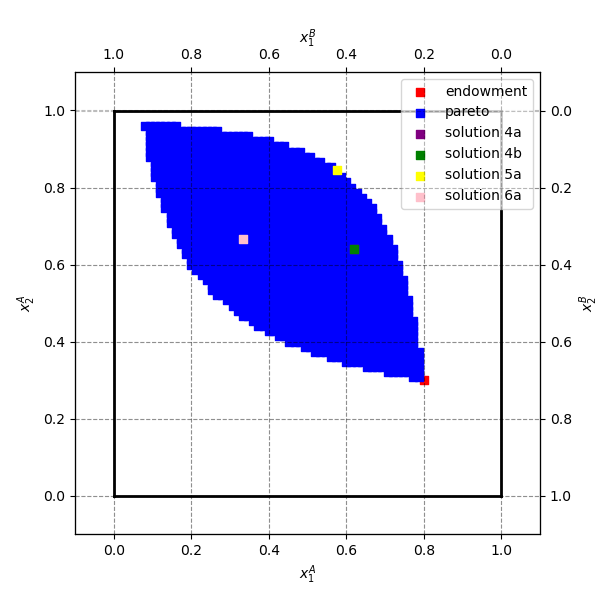

In [75]:
# Question 6b

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='red',label='endowment')
ax_A.scatter(possible_x1A,possible_x2A,marker='s',color='blue',label='pareto')
ax_A.scatter(x1A_4a,x2A_4a,marker='s',color='purple',label='solution 4a')
ax_A.scatter(x1A_4b,x2A_4b,marker='s',color='green',label='solution 4b')
ax_A.scatter(optimal_xA_5a[0],optimal_xA_5a[1],marker='s',color='yellow',label='solution 5a')
ax_A.scatter(optimal_xA_6a[0],optimal_xA_6a[1],marker='s',color='pink',label='solution 6a')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.0,1.0));

Conclusion:

# Question 7

Explanation...

<class 'numpy.ndarray'>


C:\Users\EmilW\AppData\Local\Temp\ipykernel_19668\2288600452.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


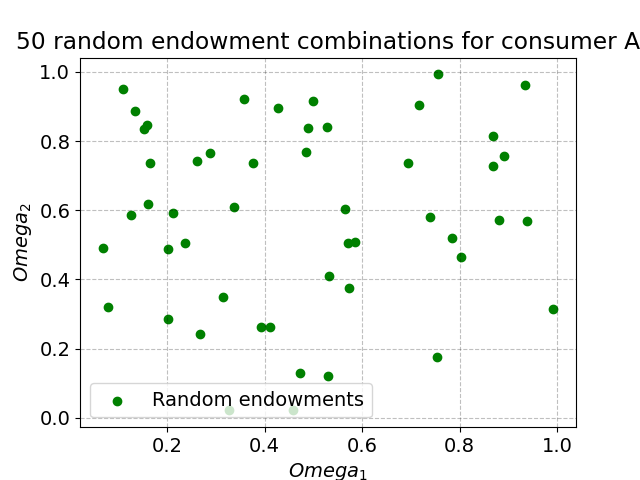

In [110]:
#code
np.random.seed(2000)
omega1A = np.random.uniform(low=0,high=1,size=50)
omega2A = np.random.uniform(low=0,high=1,size=50)

fig = plt.figure()

# b. create the plot 
ax = fig.add_subplot(1,1,1)

ax.scatter(omega1A, omega2A, color='green', label='Random endowments')

ax.set_title('50 random endowment combinations for consumer A')
ax.set_xlabel('$Omega_1$')
ax.set_ylabel('$Omega_2$')
ax.legend(loc='lower left');

Conclusion:

# Question 8

Explanation...

In [111]:
#code
model = ExchangeEconomyClass()

def find_optimal_allocation_constrained():
    xA1, 
    xA1 = model.x[0]
    xA2 = x[1]
    return -(self.utility_A(xA1, xA2) + self.utility_B(1 - xA1, 1 - xA2))
        
    def objective_function(x):
        x1A, x2A = x
        return -model.utility_A(x1A, x2A)  

        # We define constraints
        constraints = ({'type': 'ineq', 'fun': lambda x: model.utility_B(1 - x[0], 1 - x[1]) - model.utility_B(1-par.w1A, 1-par.w2A)},
                       {'type': 'ineq', 'fun': lambda x: model.utility_A(x[0], x[1]) - model.utility_B(par.w1A, par.w2A)})
        # Minimize the negative utility function subject to constraints
        result = optimize.minimize(objective_function, init_guess, constraints=constraints, bounds=[(0,1),(0,1)], method='SLSQP')

        # Extract optimal allocation
        optimal_allocation_A = result.x
        optimal_allocation_B = [1 - result.x[0], 1 - result.x[1]]  # Here we calculate B's allocation from A's

        return optimal_allocation_A, optimal_allocation_B

Conclusion: